In [4]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [5]:
#importing nescessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [6]:
data = pd.read_csv("ADXL345_SensorData.csv")


In [7]:
data.head()

,X-direction,Y-direction,Z-direction,Error_found
0,0.31,1.02,-9.18,no
1,-0.78,0.98,-9.10,no
2,0.04,0.67,-8.28,no
3,-0.04,0.90,-8.16,no
4,0.00,1.26,-7.77,no


In [8]:
data.describe()

,X-direction,Y-direction,Z-direction
count,1082.000000,1082.000000,1082.000000
mean,-0.130176,1.087421,9.861155
std,0.209577,0.174106,5.657546
min,-1.840000,-0.040000,-10.400000
25%,-0.240000,0.990000,11.490000
50%,-0.120000,1.100000,11.610000
75%,-0.040000,1.180000,11.730000
max,1.650000,1.730000,12.360000


In [9]:
data.shape
data.isnull().any()

X-direction    False
Y-direction    False
Z-direction    False
Error_found    False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X-direction  1082 non-null   float64
 1   Y-direction  1082 non-null   float64
 2   Z-direction  1082 non-null   float64
 3   Error_found  1082 non-null   object 
dtypes: float64(3), object(1)
memory usage: 33.9+ KB


In [11]:
data['Error_found'] = data['Error_found'].map({'no' : 0, 'yes': 1}) 

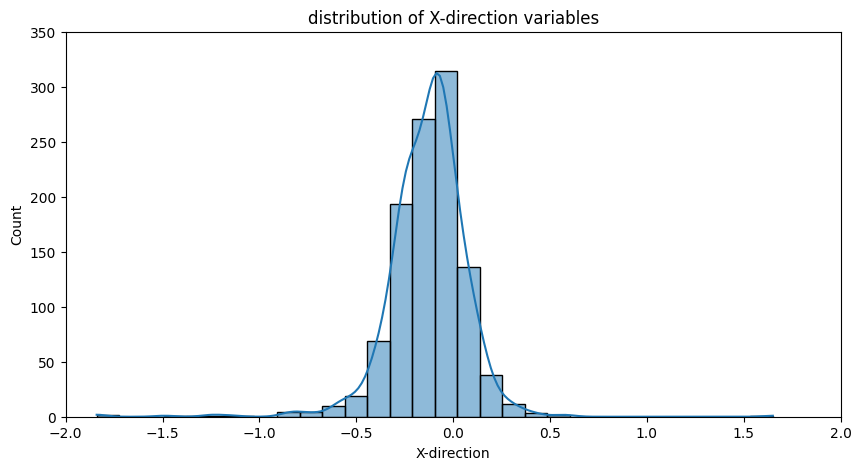

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data['X-direction'], bins=30, kde=True)
plt.title('distribution of X-direction variables')
plt.xlim(-2.0,2.0)
plt.ylim(0,350)
plt.show()

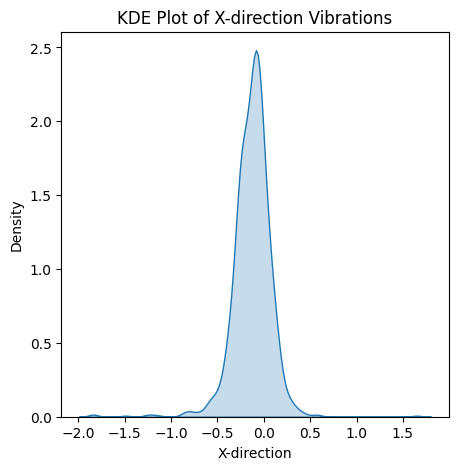

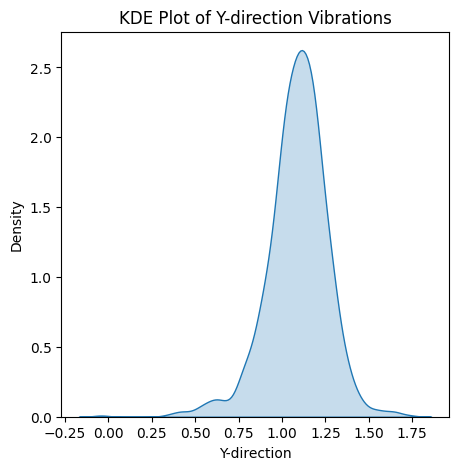

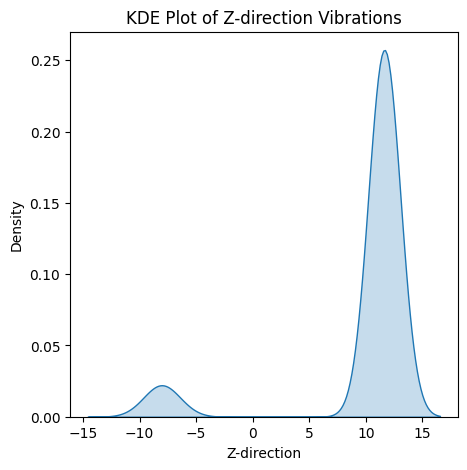

In [13]:
# KDE Plot for X-direction Vibrations
plt.figure(figsize=(5, 5))
sns.kdeplot(data['X-direction'], fill=True)
plt.title('KDE Plot of X-direction Vibrations')
plt.xlabel('X-direction')
plt.ylabel('Density')
plt.show()

# KDE Plot for Y-direction Vibrations
plt.figure(figsize=(5, 5))
sns.kdeplot(data['Y-direction'], fill=True)
plt.title('KDE Plot of Y-direction Vibrations')
plt.xlabel('Y-direction')
plt.ylabel('Density')
plt.show()

# KDE Plot for Z-direction Vibrations
plt.figure(figsize=(5, 5))
sns.kdeplot(data['Z-direction'], fill=True)
plt.title('KDE Plot of Z-direction Vibrations')
plt.xlabel('Z-direction')
plt.ylabel('Density')
plt.show()


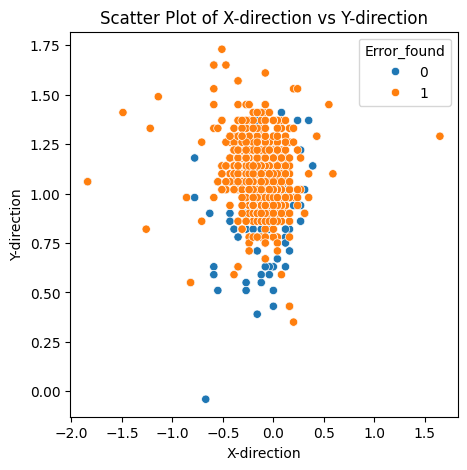

In [14]:
# Scatter Plot: X-direction vs Y-direction, colored by 'Error found'
plt.figure(figsize=(5, 5))
sns.scatterplot(data=data, x='X-direction', y='Y-direction', hue='Error_found')
plt.title('Scatter Plot of X-direction vs Y-direction')
plt.xlabel('X-direction')
plt.ylabel('Y-direction')
plt.show()


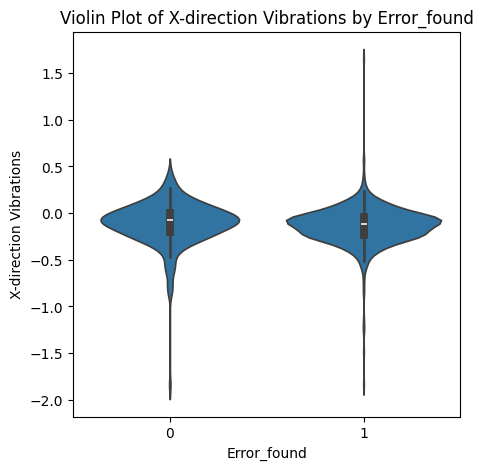

In [15]:
plt.figure(figsize=(5, 5))
sns.violinplot(data=data, x='Error_found', y='X-direction')
plt.title('Violin Plot of X-direction Vibrations by Error_found')
plt.xlabel('Error_found')
plt.ylabel('X-direction Vibrations')
plt.show()


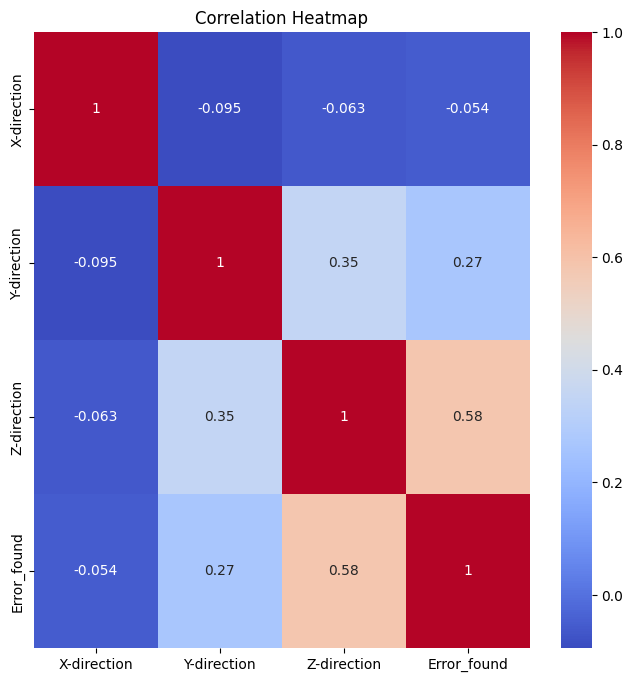

In [16]:
plt.figure(figsize=(8, 8))  # Set figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


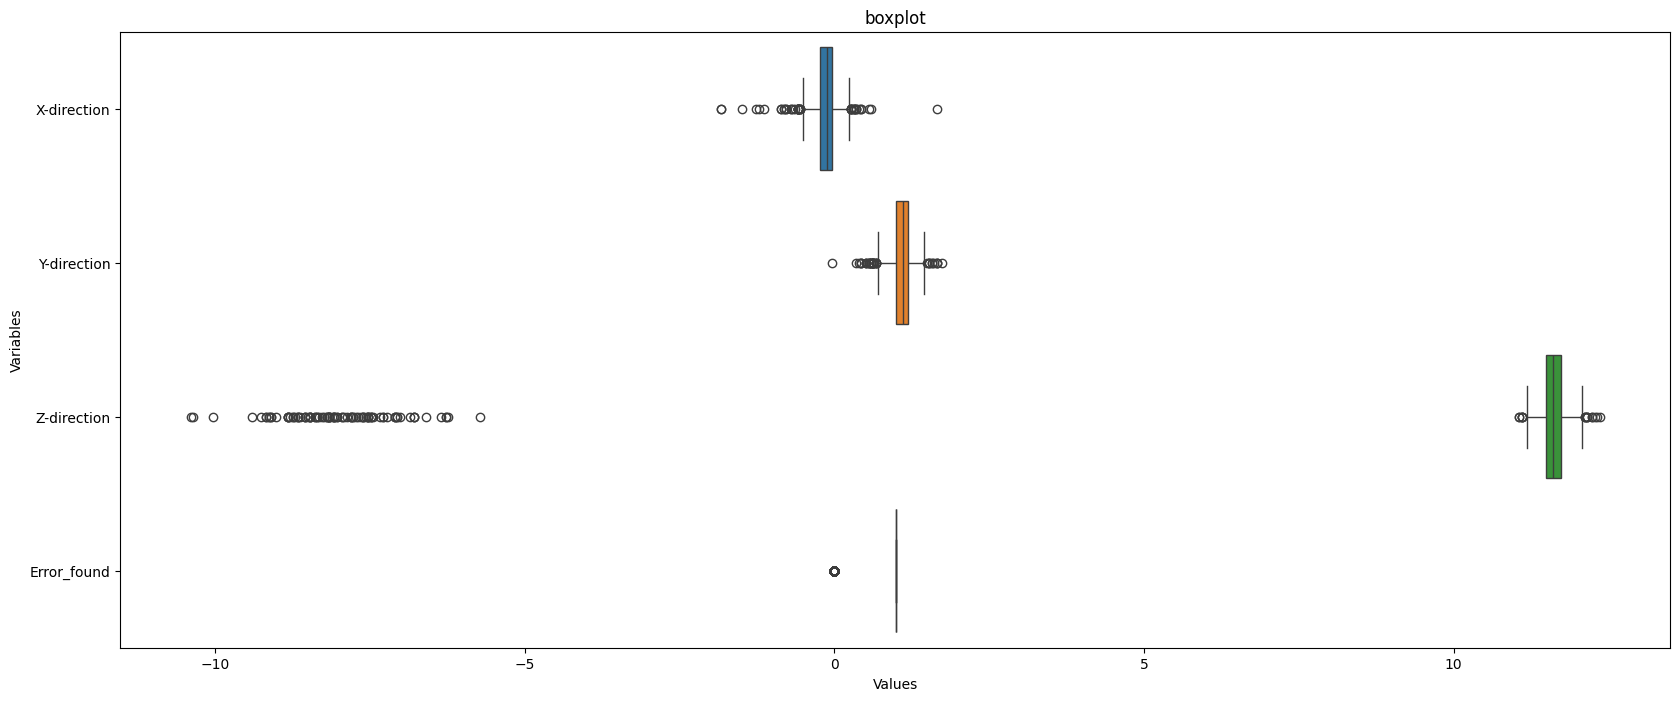

In [17]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data, orient='h')
plt.title("boxplot")
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

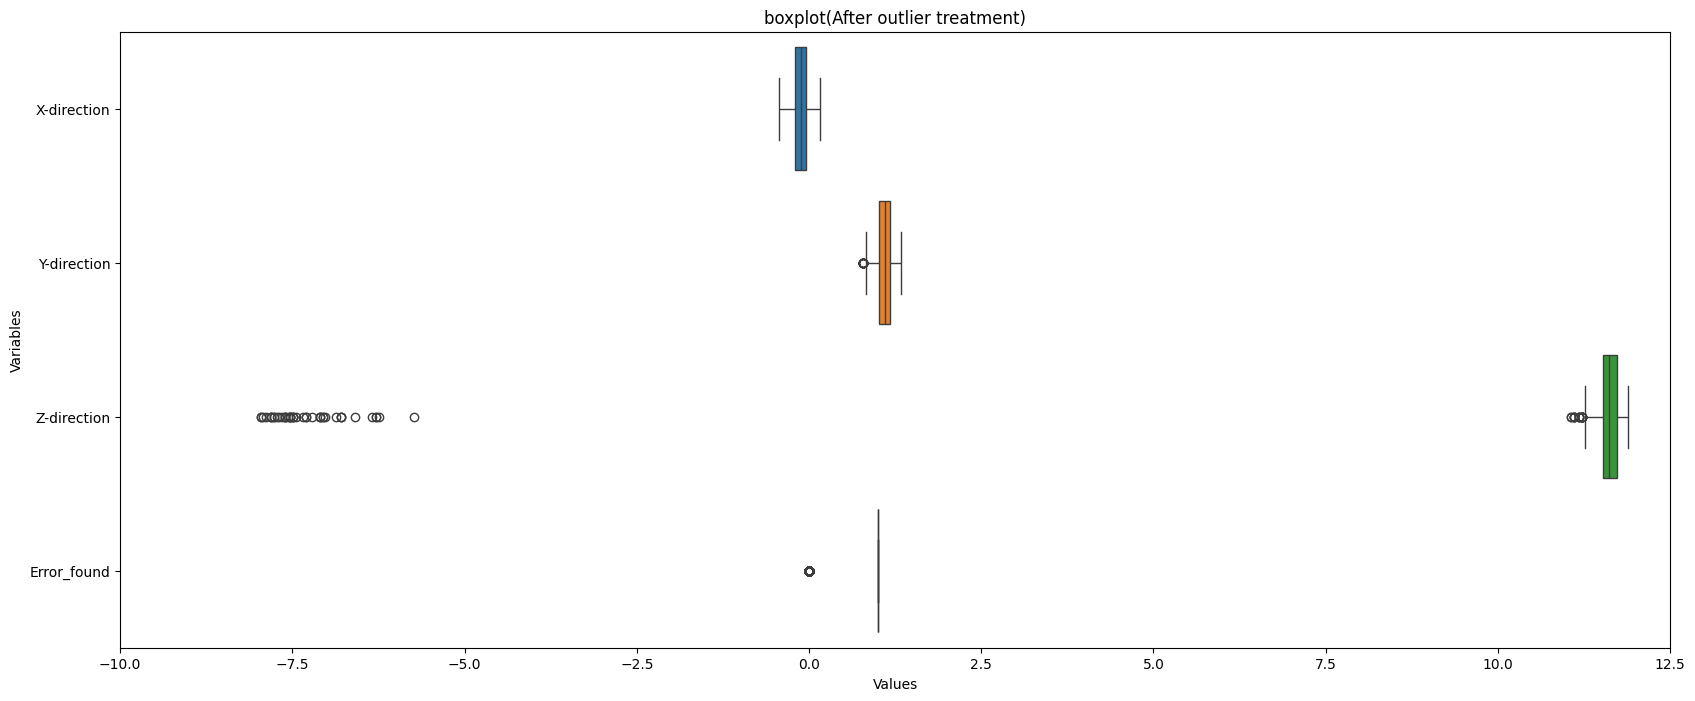

In [18]:
def replace_outliers_with_median_percentile(data, lower_percentile=5, upper_percentile=95):
    for column in data.select_dtypes(include='number').columns:
        lower_bound = np.percentile(data[column], lower_percentile)
        upper_bound = np.percentile(data[column], upper_percentile)
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        data.loc[outliers, column] = data[column].median()
    return data

data = replace_outliers_with_median_percentile(data)

plt.figure(figsize=(20,8))
sns.boxplot(data=data.select_dtypes(include='number'), orient='h')
plt.title("boxplot(After outlier treatment)")
plt.xlabel('Values')
plt.ylabel('Variables')
plt.xlim(-10, 12.5)
plt.show()


In [19]:
data['Error_found'].value_counts()

Error_found
1    833
0    249
Name: count, dtype: int64

In [20]:
x = data[['X-direction', 'Y-direction', 'Z-direction']]
y = data['Error_found']


In [21]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [22]:
y_train.value_counts()


Error_found
1    665
0    200
Name: count, dtype: int64

In [23]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)


In [25]:
# Model Training and Hyperparameter Tuning
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [26]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [27]:
svc = SVC(class_weight='balanced')
param_grid = {'C': [0.01, 0.1, 1, 10],'kernel': ['linear', 'rbf', 'poly'],'gamma': ['scale', 'auto']}
grid_svc = GridSearchCV(svc, param_grid, cv=5)
grid_svc.fit(x_train, y_train)
svc_model = grid_svc.best_estimator_


In [28]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [29]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
param_grid_xgb = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [30]:
# Function to calculate and print evaluation metrics
def evaluate_model(model, x_test, y_test, model_name):
    
    y_pred = model.predict(x_test)

    print(f"\n=== {model_name} ===")
    
     # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    except (ValueError, AttributeError):
        print("ROC AUC Score: Not applicable")


# Evaluate Logistic Regression
evaluate_model(log_reg, x_test, y_test, "Logistic Regression")

# Evaluate Random Forest (using best estimator from GridSearchCV)
evaluate_model(grid_rf.best_estimator_, x_test, y_test, "Random Forest")

# Evaluate Support Vector Classifier (using best estimator from GridSearchCV)
evaluate_model(grid_svc.best_estimator_, x_test, y_test, "Support Vector Classifier")

# Evaluate K-Nearest Neighbors (KNN) (using best estimator from GridSearchCV)
evaluate_model(grid_knn.best_estimator_, x_test, y_test, "K-Nearest Neighbors")

# Evaluate XGBoost Classifier (using best estimator from GridSearchCV)
evaluate_model(grid_xgb.best_estimator_, x_test, y_test, "XGBoost Classifier")





=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.63      0.53        49
           1       0.88      0.79      0.83       168

    accuracy                           0.75       217
   macro avg       0.67      0.71      0.68       217
weighted avg       0.79      0.75      0.76       217

Confusion Matrix:
[[ 31  18]
 [ 36 132]]
Accuracy: 0.7512
ROC AUC Score: 0.7092

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.37      0.40        49
           1       0.82      0.86      0.84       168

    accuracy                           0.75       217
   macro avg       0.63      0.62      0.62       217
weighted avg       0.74      0.75      0.74       217

Confusion Matrix:
[[ 18  31]
 [ 23 145]]
Accuracy: 0.7512
ROC AUC Score: 0.6152

=== Support Vector Classifier ===
Classification Report:
              precision    rec

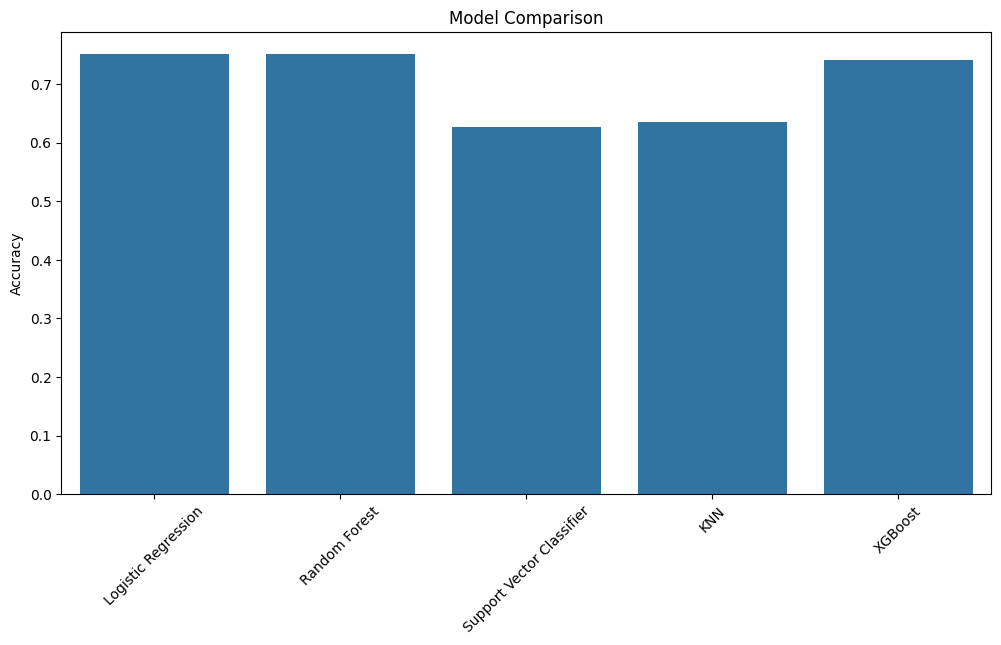

In [31]:
# Get predictions from each model on x_test
y_preds = [
    log_reg.predict(x_test),
    grid_rf.best_estimator_.predict(x_test),
    grid_svc.best_estimator_.predict(x_test),
    grid_knn.best_estimator_.predict(x_test),
    grid_xgb.best_estimator_.predict(x_test),
   
]

models = ['Logistic Regression', 'Random Forest', 'Support Vector Classifier', 'KNN', 'XGBoost', ]

# Calculate accuracies for each model
accuracies = [accuracy_score(y_test, y_pred) for y_pred in y_preds]

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [32]:
best_model_index = np.argmax(accuracies)
best_model_name = models[best_model_index]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_model_index]:.4f}")


The best model is: Logistic Regression with an accuracy of 0.7512


In [33]:
# Get the best model object
model_objects = [
    log_reg,
    grid_rf.best_estimator_,
    grid_svc.best_estimator_,
    grid_knn.best_estimator_,
    grid_xgb.best_estimator_,
    
]
best_model = model_objects[best_model_index]

# Predict using the best model
y_test_pred = best_model.predict(x_test)

# Print predictions vs actual labels
print("\nPredictions vs Actual Labels:")
for i in range(len(y_test)):
    print(f"Sample {i+1}: Prediction = {y_test_pred[i]}, Actual = {y_test.iloc[i]}")

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")




Predictions vs Actual Labels:
Sample 1: Prediction = 0, Actual = 0
Sample 2: Prediction = 1, Actual = 1
Sample 3: Prediction = 0, Actual = 1
Sample 4: Prediction = 1, Actual = 1
Sample 5: Prediction = 0, Actual = 0
Sample 6: Prediction = 1, Actual = 1
Sample 7: Prediction = 1, Actual = 1
Sample 8: Prediction = 1, Actual = 1
Sample 9: Prediction = 0, Actual = 0
Sample 10: Prediction = 0, Actual = 1
Sample 11: Prediction = 0, Actual = 1
Sample 12: Prediction = 1, Actual = 1
Sample 13: Prediction = 0, Actual = 0
Sample 14: Prediction = 1, Actual = 1
Sample 15: Prediction = 1, Actual = 1
Sample 16: Prediction = 1, Actual = 1
Sample 17: Prediction = 1, Actual = 1
Sample 18: Prediction = 0, Actual = 1
Sample 19: Prediction = 0, Actual = 1
Sample 20: Prediction = 1, Actual = 1
Sample 21: Prediction = 1, Actual = 0
Sample 22: Prediction = 0, Actual = 1
Sample 23: Prediction = 1, Actual = 1
Sample 24: Prediction = 1, Actual = 0
Sample 25: Prediction = 1, Actual = 1
Sample 26: Prediction = 0, A

In [34]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)